In [11]:
import pandas

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
usd_rates= pandas.read_excel("usd_rates.xlsx")

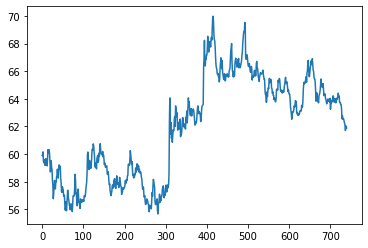

In [13]:
usd_rates.curs.plot()

In [14]:
past = 28 # Посмотрим на 28 дней в прошлое
future = 7 # Предскажем на 7 дней в будущее

In [15]:
money = usd_rates.curs

In [16]:
money[(100-past):100]

72    56.0794
73    55.8453
74    56.3131
75    56.9707
76    56.9838
77    56.9518
78    57.0927
79    57.5714
80    58.5382
81    58.0824
82    57.1161
83    57.1640
84    56.5258
85    56.2603
86    56.7383
87    57.4683
88    57.1602
89    56.4988
90    56.5552
91    56.2743
92    56.0701
93    56.7560
94    56.7106
95    56.5168
96    56.6876
97    56.5373
98    56.6876
99    56.6152
Name: curs, dtype: float64

In [17]:
money[100:(100+future)]

100    56.6747
101    56.5878
102    56.9857
103    57.0020
104    56.9096
105    57.0303
106    57.4437
Name: curs, dtype: float64

In [18]:
len(money)

740

In [19]:
start = past
end = len(money) - future
count = len(money)
print(f"Всего {count}, мы рассмотрим с {start} по {end}")

Всего 740, мы рассмотрим с 28 по 733


In [20]:
table = []
for i in range(start, end):
    s = money[(i - past):(i + future)]
    table.append(list(s))

In [21]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [22]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [23]:
dataframe = pandas.DataFrame(table, columns=(past_columns + future_columns))

In [24]:
# Обучающая выборка (тренировочная) "Учебник"
X = dataframe[past_columns][:-10] # Данные, на основе которых делаем предсказание
Y = dataframe[future_columns][:-10] # Что пытаемся предсказать (target)

In [25]:
# Тестовая выборка (проверочная) "Экзамен"
X_test = dataframe[past_columns][-10:] # Вопросы на экзамен
Y_test = dataframe[future_columns][-10:] # Ответы

In [26]:
# from sklearn.linear_model import LinearRegression
# LR = LinearRegression() # Гиперпараметры, "настройки" модели
# LR.fit(X,Y)
# from sklearn.neighbors import KNeighborsRegressor
# KNN = KNeighborsRegressor(n_neighbors=1)
# KNN.fit(X,Y)
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=2000, random_state=42)
MLP.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [27]:
#LR.predict(X_test.head(1))
KNN.predict([X_test.iloc[0]])

NameError: name 'KNN' is not defined

In [ ]:
Y_test.iloc[0]

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [ ]:
for i in range(10):
    # prediction = LR.predict([X_test.iloc[i]])
    #prediction = KNN.predict([X_test.iloc[i]])
    prediction = MLP.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0], Y_test.iloc[i])
    print(f"Day #{i}, error = {err}")
    
    plt.plot(prediction[0], label="Prediction")
    plt.plot(Y_test.iloc[i], label="Real data")
    plt.legend()
    plt.show()

In [ ]:
X_test.iloc[4]

In [ ]:
Y_test.iloc[4]

In [ ]:
LR.predict([X_test.iloc[4]])[0]

In [ ]:
import pickle

In [ ]:
pickle.dump(MLP, open("mlp_model.bin", "wb"))

In [ ]:
loaded_model = pickle.load(open("mlp_model.bin", "rb"))

In [ ]:
loaded_model.predict([X_test.iloc[3]])

День 3

In [ ]:
# GridSearchCV
# CV - cross-validation

# Переобучение overfitting - хорошие результаты обучающей, 
# неплохие тестовой, но очень плохие в реальности

# Test (*)
# Train (X)

# [XXXXXXXXXXXXXXXXXXXXXXXXXXX****] - как делали вчера
# [XXXXXXXXXXXXXXXXXXX************] - лучше

# Cross-validation
# [XXXXXXXXXXXXXXXXXXXXXXXX*******]
# [XXXXXXXXXXXXXXXX*******XXXXXXXX]
# [XXXXXXXXX*******XXXXXXXXXXXXXXX]
# [XXX*******XXXXXXXXXXXXXXXXXXXXX]
# [*******XXXXXXXXXXXXXXXXXXXXXXXX]

# estimator - модель
# param_grid - сетка параметров
# scoring - как оценивать качество (I.e. - MAE - mean absolute error)
# cv - сколько делать кросс-валидаций

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [34]:
# сетка параметров
params = {
    "max_features":['sqrt', 'log2'],
    "max_depth":[5, 20],
    "n_estimators": [100, 500, 1000]
}

# 12 комбинаций
# CV = 5
# 60 моделей
GS = GridSearchCV(RFR, params, 'neg_mean_absolute_error', cv=5, n_jobs=-1)


In [35]:
GS.fit(X, Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
GS.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}

In [37]:
GS.best_score_

-0.8000714307665309

In [38]:
GS.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Day #0, error = 0.8126057331371845


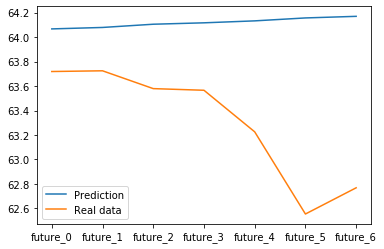

Day #1, error = 1.0288249021111884


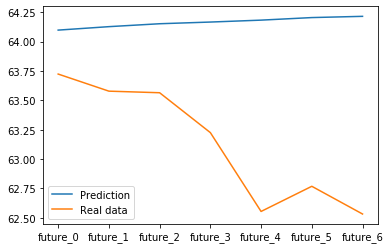

Day #2, error = 1.2003963390415078


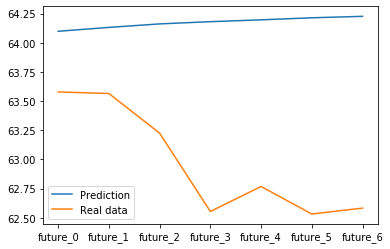

Day #3, error = 1.371899580334733


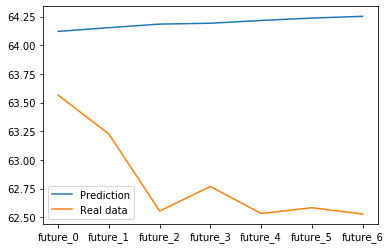

Day #4, error = 1.5607231859376358


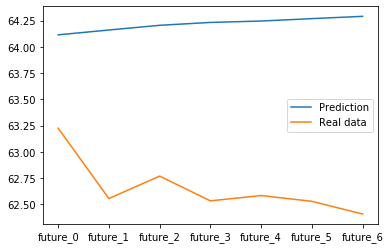

Day #5, error = 1.4747441009496651


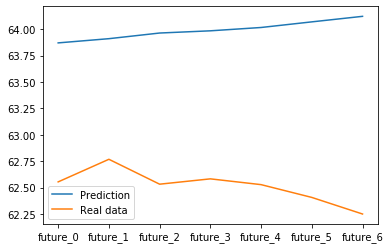

Day #6, error = 1.3135462101402737


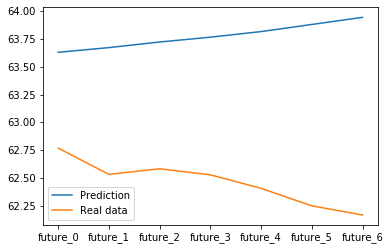

Day #7, error = 1.3442385929689848


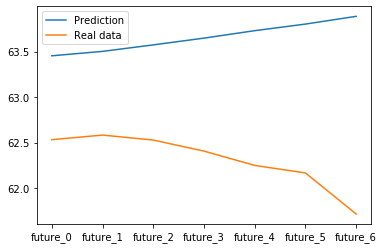

Day #8, error = 1.409013205004118


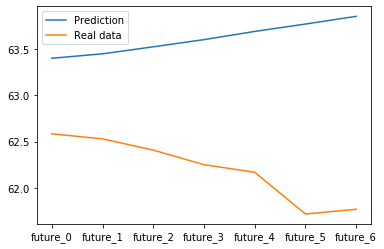

Day #9, error = 1.4309812038762766


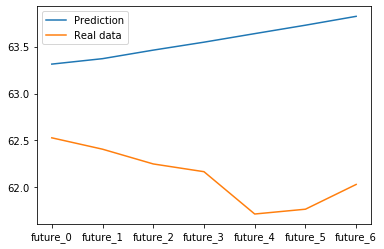

In [42]:
for i in range(10):
    prediction = GS.best_estimator_.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0], Y_test.iloc[i])
    print(f"Day #{i}, error = {err}")
    
    plt.plot(prediction[0], label="Prediction")
    plt.plot(Y_test.iloc[i], label="Real data")
    plt.legend()
    plt.show()